In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('Data_clean/Locus_sensors/1.C01_processed.xlsx')

In [4]:
df.info

<bound method DataFrame.info of                     Date  Count
0    2024-04-01 11:48:55    NaN
1    2024-04-01 19:48:58    NaN
2    2024-04-02 09:57:03    1.0
3    2024-04-02 10:02:02    0.0
4    2024-04-02 10:07:02    0.0
...                  ...    ...
4242 2024-05-31 17:46:49    0.0
4243 2024-05-31 17:51:49    0.0
4244 2024-05-31 17:56:49    0.0
4245 2024-05-31 18:01:49    0.0
4246 2024-05-31 19:56:27    NaN

[4247 rows x 2 columns]>

8.815751445086706


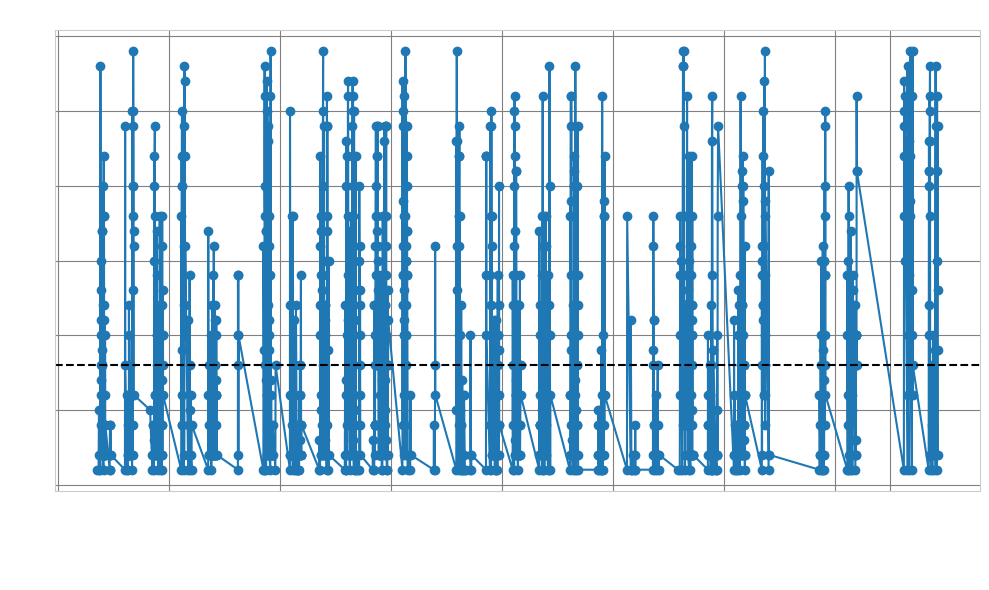

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

# Step 2: Filter the DataFrame for the desired date range (first week of April 2024)
start_date = '2024-04-01'
end_date = '2024-05-03'
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
df_week = df.loc[mask]

# Step 3: Drop rows with NaN values in 'Count'
df_week_cleaned = df_week.dropna(subset=['Count'])

# Step 4: Filter out rows where 'Count' is zero
df_week_non_zero = df_week_cleaned[df_week_cleaned['Count'] != 0]
df_week_non_zero = df_week_non_zero[df_week_non_zero['Count'] < 30]
print(df_week_non_zero['Count'].mean())
# Step 5: Plot the data with adjustments for dark mode
plt.figure(figsize=(10, 6))
plt.plot(df_week_non_zero['Date'], df_week_non_zero['Count'], marker='o', linestyle='-',)
plt.xlabel('Date', color='white')
plt.ylabel('Count', color='white')
plt.title('Count phonebooth one day', color='white')
plt.grid(True, color='gray')
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')
plt.gca().tick_params(axis='x', colors='white')
plt.gca().tick_params(axis='y', colors='white')
plt.tight_layout()
plt.axhline(y=8, color='black', linestyle='--')

# Display the plot
plt.show()